Dataset Shape: (500, 5)

Column Names: ['Area_SqFt', 'Bedrooms', 'Age_Years', 'Location', 'Price']

Data Types:
 Area_SqFt     int64
Bedrooms      int64
Age_Years     int64
Location     object
Price         int64
dtype: object

Summary Statistics:
          Area_SqFt    Bedrooms   Age_Years          Price
count   500.000000  500.000000  500.000000     500.000000
mean   2156.008000    3.030000   20.454000  300020.722000
std     744.264272    1.445434   11.559374   92501.424572
min     801.000000    1.000000    0.000000  120443.000000
25%    1545.250000    2.000000   10.000000  227493.000000
50%    2163.000000    3.000000   21.000000  295271.000000
75%    2756.000000    4.000000   31.000000  377071.750000
max    3495.000000    5.000000   39.000000  494988.000000

Missing values: 0


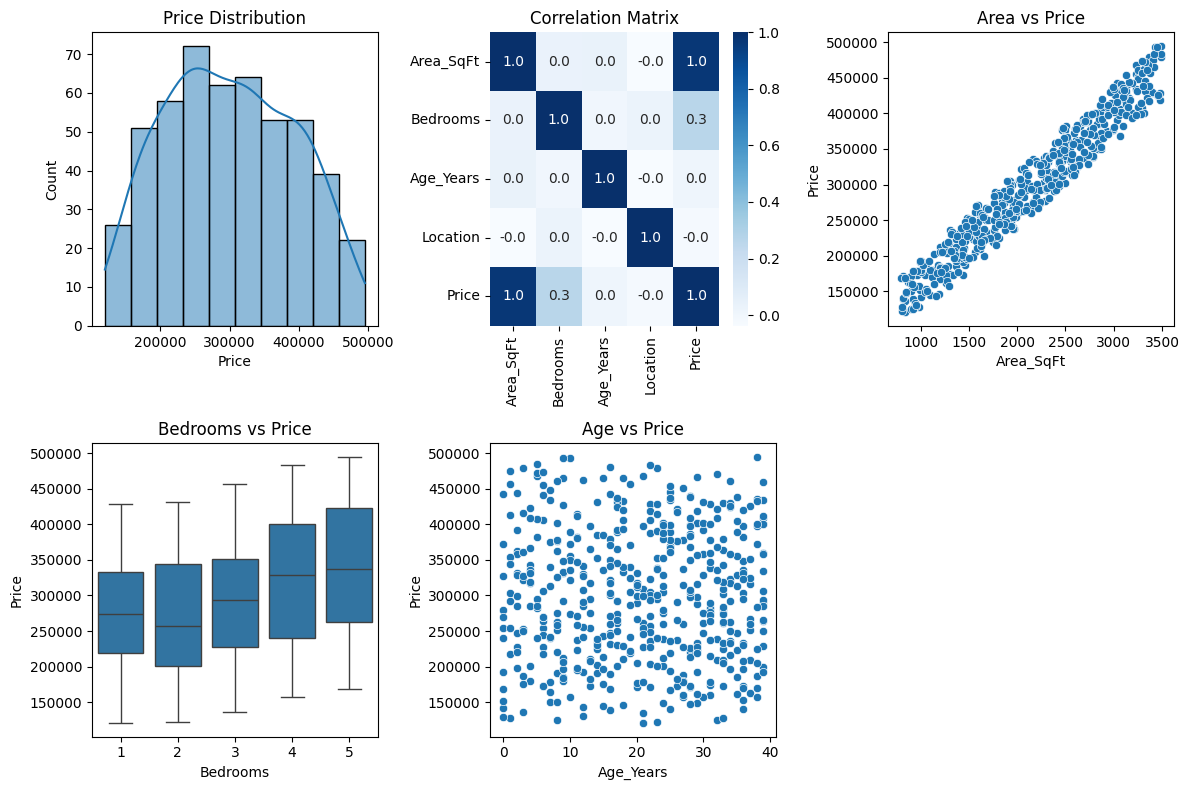


Linear Regression Results
MSE: 39049141.23895244
R2 Score: 0.9953688641042261

Classification Results
Confusion Matrix:
 [[52  1]
 [ 3 44]]
Accuracy: 0.96


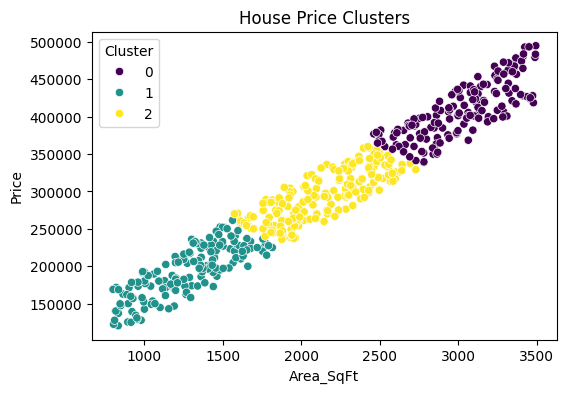


Observations:
- Price increases with area and number of bedrooms.
- Linear regression performed well due to linear data.
- Decision tree correctly classified high and low priced houses.
- K-Means grouped houses into different price ranges.



In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

# --------------------------------------------------
# Creating a sample house price dataset
# --------------------------------------------------
np.random.seed(42)
rows = 500

data = {
    'Area_SqFt': np.random.randint(800, 3500, rows),
    'Bedrooms': np.random.randint(1, 6, rows),
    'Age_Years': np.random.randint(0, 40, rows),
    'Location': np.random.choice(['Downtown', 'Suburban', 'Rural'], rows)
}

df = pd.DataFrame(data)

# Creating price column using simple logic
df['Price'] = (
    df['Area_SqFt'] * 120 +
    df['Bedrooms'] * 15000 -
    df['Age_Years'] * 200 +
    np.random.randint(-10000, 10000, rows)
)

# --------------------------------------------------
# Understanding the data
# --------------------------------------------------
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())

# --------------------------------------------------
# Data preprocessing
# --------------------------------------------------
print("\nMissing values:", df.isnull().sum().sum())

# Encoding categorical column
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])

# --------------------------------------------------
# Exploratory Data Analysis
# --------------------------------------------------
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')

plt.subplot(2, 3, 2)
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt='.1f')
plt.title('Correlation Matrix')

plt.subplot(2, 3, 3)
sns.scatterplot(x='Area_SqFt', y='Price', data=df)
plt.title('Area vs Price')

plt.subplot(2, 3, 4)
sns.boxplot(x='Bedrooms', y='Price', data=df)
plt.title('Bedrooms vs Price')

plt.subplot(2, 3, 5)
sns.scatterplot(x='Age_Years', y='Price', data=df)
plt.title('Age vs Price')

plt.tight_layout()
plt.show()

# --------------------------------------------------
# Linear Regression Model
# --------------------------------------------------
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("\nLinear Regression Results")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# --------------------------------------------------
# Classification using Decision Tree
# --------------------------------------------------
median_price = df['Price'].median()
df['Price_Class'] = (df['Price'] > median_price).astype(int)

X_cls = df.drop(['Price', 'Price_Class'], axis=1)
y_cls = df['Price_Class']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_c, y_train_c)

y_pred_c = dt.predict(X_test_c)

print("\nClassification Results")
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c))
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))

# --------------------------------------------------
# K-Means Clustering
# --------------------------------------------------
scaler = StandardScaler()
X_cluster = df[['Area_SqFt', 'Price']]
X_cluster_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='Area_SqFt',
    y='Price',
    hue='Cluster',
    data=df,
    palette='viridis'
)
plt.title('House Price Clusters')
plt.show()

# --------------------------------------------------
# Final Observation
# --------------------------------------------------
print("""
Observations:
- Price increases with area and number of bedrooms.
- Linear regression performed well due to linear data.
- Decision tree correctly classified high and low priced houses.
- K-Means grouped houses into different price ranges.
""")
